# 1. Import Necessary Libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,levene,ttest_ind, chi2_contingency,chisquare,f_oneway

# 2. Read the Data as DataFrame

In [163]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform EDA which include the following and print out your insights at every step

#  3.a. Shape of the Data

In [164]:
df.shape

(1338, 7)

# 3.b. Data Type of each attribute

In [165]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# 3.c. Checking the presence of missing values

In [166]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values. Hence no action required

# 3.d. 5 Point Summary of Numerical Attributes

In [167]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.e. Distribution of bmi, Age and charges columns

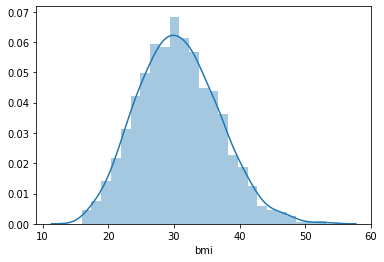

In [168]:
sns.distplot(df['bmi'])
plt.show()

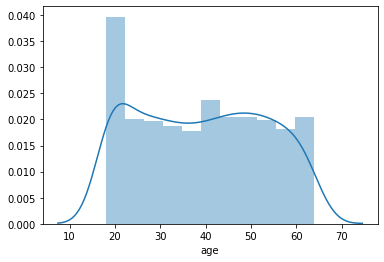

In [169]:
sns.distplot(df['age'])
plt.show()

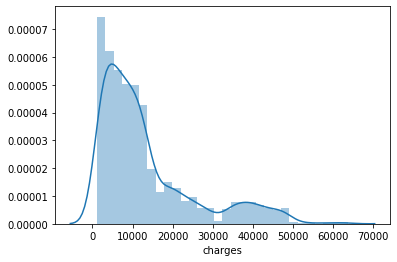

In [170]:
sns.distplot(df['charges'])
plt.show()

# 3.f. Measure of skewness of bmi, age and charges

In [171]:
skew(df['bmi'])

0.28372857291709386

In [172]:
skew(df['age'])

0.055610083072599126

In [173]:
skew(df['charges'])

1.5141797118745743

# 3.g. Check the Presence of outlier in bmi,age and charges columns

8.3975
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


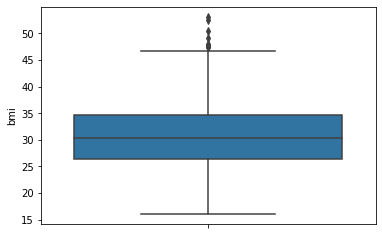

In [174]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

a = Q1-(1.5*IQR)
b = Q3+(1.5*IQR)

filter1 = df['bmi'] < a

filter2 = df['bmi'] > b

print(df.loc[filter1 | filter2])



sns.boxplot(y=df['bmi'])
plt.show()

24.0
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


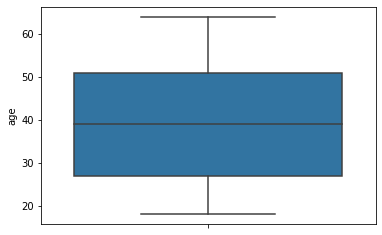

In [175]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

a = (Q1-(1.5*IQR))
b = (Q3+(1.5*IQR))

filter1 = df['age'] < a
filter2 = df['age'] > b

print(df.loc[filter1 | filter2])

sns.boxplot(y=df['age'])
plt.show()

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
34     28    male  36.400         1    yes  southwest  51194.55914
38     35    male  36.670         1    yes  northeast  39774.27630
39     60    male  39.900         0    yes  southwest  48173.36100
49     36    male  35.200         1    yes  southeast  38709.17600
53     36    male  34.430         0    yes  southeast  37742.57570
55     58    male  36.955         2    yes  northwest  47496.49445
82     22    male  37.620         1    yes  southeast  37165.16380
84     37  female  34.800         2    yes  southwest  39836.51900
86     57  female  31.160         0    yes  northwest  43578.9

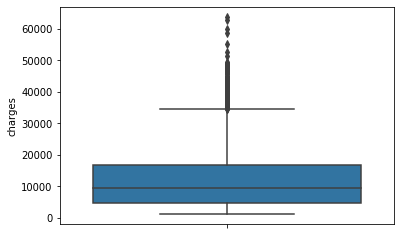

In [176]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3-Q1

a = (Q1-(1.5*IQR))
b = (Q3+(1.5*IQR))

filter1 = df['charges'] < a
filter2 = df['charges'] > b

print(df.loc[filter1 | filter2])

sns.boxplot(y=df['charges'])
plt.show()

# 3.h. Distribution of Categorical Columns includes children

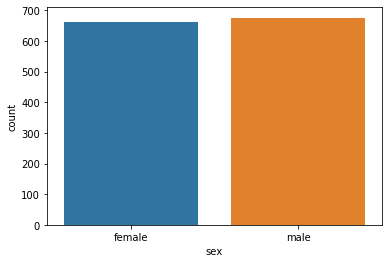

In [177]:
sns.countplot(x=df['sex'])
plt.show()

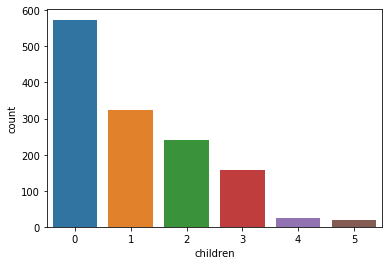

In [178]:
sns.countplot(x=df['children'])
plt.show()

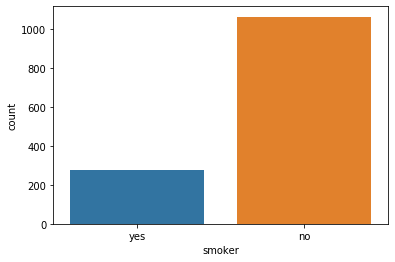

In [179]:
sns.countplot(x=df['smoker'])
plt.show()

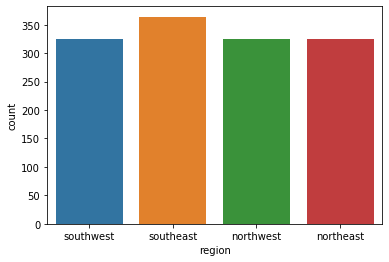

In [180]:
sns.countplot(x=df['region'])
plt.show()

# 3.i.Pairplot that includes all columns of data

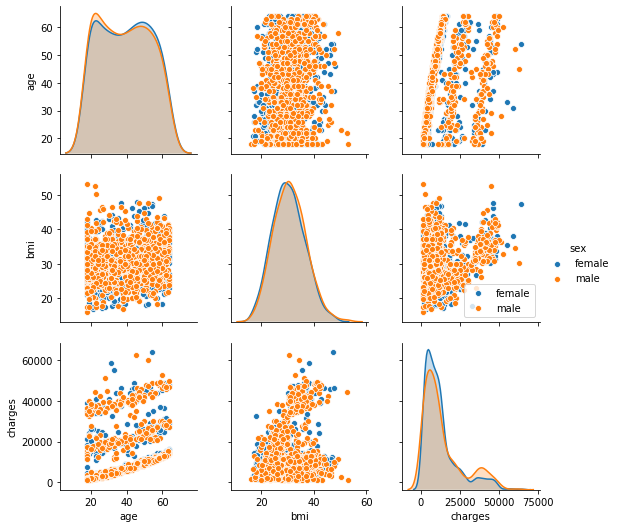

In [181]:
sns.pairplot(data=df,hue='sex',vars=['age','bmi','charges'])
plt.legend()
plt.show()

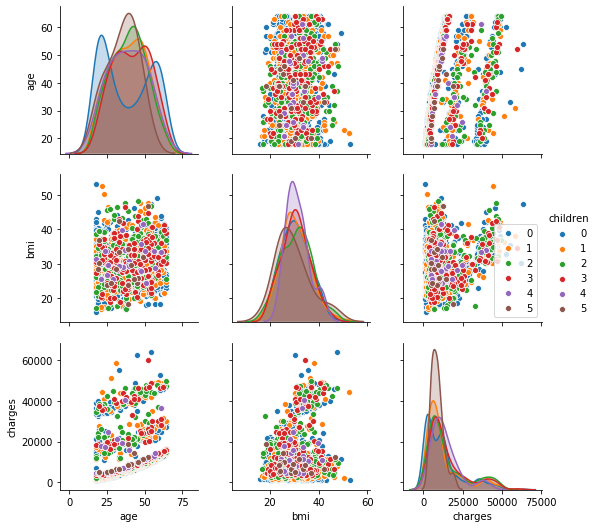

In [182]:
sns.pairplot(data=df,hue='children', vars=['age','bmi','charges'])
plt.legend()
plt.show()

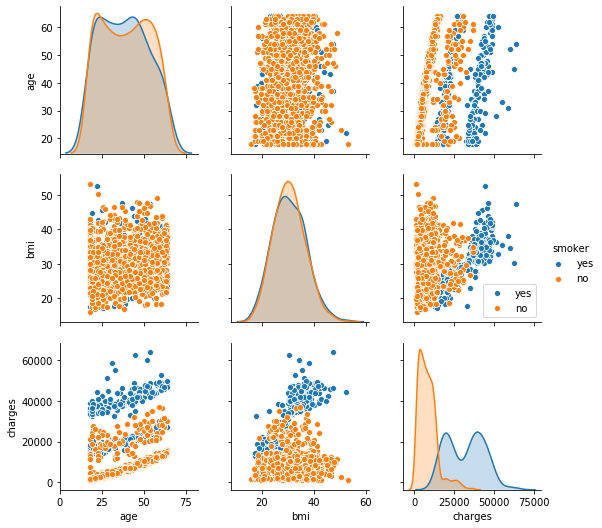

In [183]:
sns.pairplot(data=df,hue='smoker',vars=['age','bmi','charges'])
plt.legend()
plt.show()

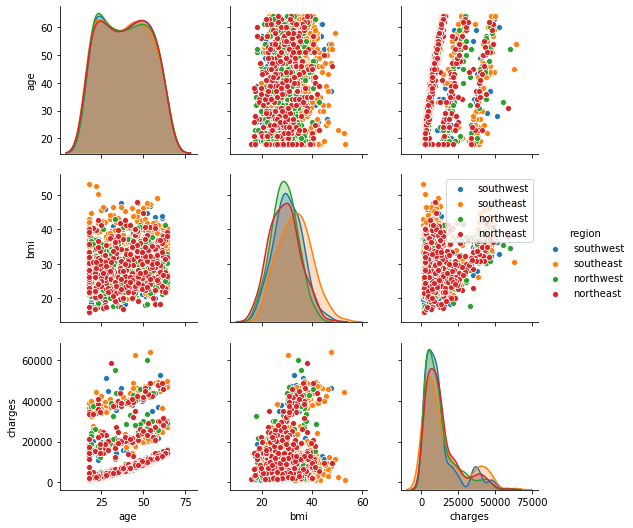

In [184]:
sns.pairplot(data=df,hue='region',vars=['age','bmi','charges'])
plt.legend()
plt.show()

# 4.a.Do charges of people who smoke differ significantly from the people who don't

H0 : Charges of people for both smoker and non-smoker are same
    
H1 : Charges of people for both smoker and non-smoker are not same.

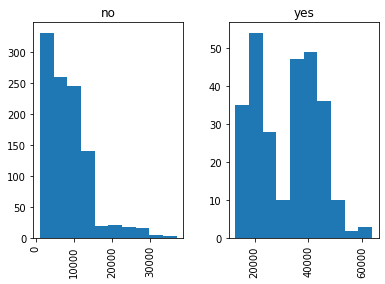

In [185]:
df.hist(column='charges',by='smoker')
plt.show()

In [186]:
sample1 = df[df['smoker']=='yes']

sample2 = df[df['smoker']=='no']

# First we need to perform levene's test for equality of variances
# H0: The variances are equal
# H1: The variances are not equal
levene(sample1['charges'],sample2['charges'])

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

From the above levene's test, the p-value < 0.05 hence reject the null hypothesis of equality variances. The variances are not equal. Now perform Separate Variance t-test.

In [187]:
ttest_ind(sample1['charges'],sample2['charges'],equal_var=False)

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

From the above, the p-value < 0.05. Hence reject null hypothesis.

Charges of people for both smoker and non-smoker are significantly differ.

# 4.b.Does bmi of males differ from that of females

H0 : The BMI for Males and Females is same
    
H1 : The BMI for Males and Females is not same.

This is the comparision between two independent groups, first check for equality of variance using levene's test

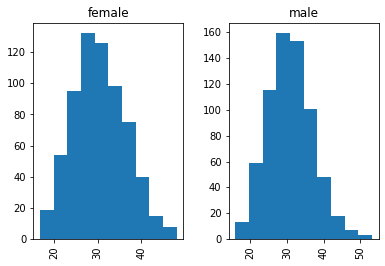

In [188]:
df.hist(column='bmi',by='sex')
plt.show()

# Hypothesis testing for levene's Test

H0: The variances of BMI for Male and Female are equal
    
H1: The variances of BMI for Male and Female are not equal

In [189]:
sample1 = df[df['sex']=='male']

sample2 = df[df['sex']=='female']

levene(sample1['bmi'],sample2['bmi'])

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

From the above, the p value > 0.05. Do not reject the null hypothesis i.e The variances of BMI for Male and Female are equal
Now perform pooled variance t-test

In [190]:
ttest_ind(sample1['bmi'],sample2['bmi'],equal_var=True)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

From the above, the p value > 0.05. Do not reject null hypothesis. The BMI for Male and Female is same.

# 4.c. Is the Proportion of smokers significantly different in different genders

H0 : The Proportion of smokers is same in different genders
    
H1 : The Proportion of smokers is not same in different genders
    
Here we are comparing two diiferent categorical columns. Use chisquare test to compare

In [191]:
chisquare(df['smoker'].value_counts())

Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)

From the above, p value < 0.05, atleast one of the proportions differ

In [192]:
chisquare(df['sex'].value_counts())

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)

From the above, the p value > 0.05 the proportions will not differ

In [193]:
cont = pd.crosstab(df['smoker'],df['sex'])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [194]:
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

From the above, the p value < 0.05. Reject the null hypothesis. The proportions of smokers significantly differ in 
different genders

# 4.d. Is the distribution of bmi across women with no child, one child and two children the same

H0 : The distributions of bmi for women with 0 child, 1 child and 2 child are same
    
H1 : The distributions of bmi for women with 0 child, 1 child and 2 child are not same

First Peform levene's test for equality of variances

H0 : The variances of bmi for women with 0 child,1 child and 2 child are same

H1 : The variances of bmi for women with 0 child,1 child and 2 child are not same


In [195]:
filter1 = df['sex'] == 'female'

filter2 = df['children'] == 0

f_0_child = df[filter1 & filter2]

filter2 = df['children'] == 1

f_1_child = df[filter1 & filter2]

filter3 = df[df['children'] == 2]

f_2_child = df[filter1 & filter2]

levene(f_0_child['bmi'],f_1_child['bmi'],f_2_child['bmi'])

LeveneResult(statistic=0.23453607796312834, pvalue=0.7910099349065074)

From the above, the p value > 0.05. Do not reject the null hypothesis of equality of variances. The variances of bmi for women
with 0 child, 1 child and 2 child are same

In [196]:
f,p = f_oneway(f_0_child['bmi'],f_1_child['bmi'],f_2_child['bmi'])
p

0.8117006997872651

From the above, the p value > 0.05. Do not reject problem statement null hypothesis. The distributions of bmi across women
with 0 child,1 child and 2 child are same.